In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as  sns
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sentimenan = SentimentIntensityAnalyzer()
data = pd.read_csv('all_kindle_review .csv')
data

,Unnamed: 0.1,Unnamed: 0,asin,helpful,rating,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,0,11539,B0033UV8HI,"[8, 10]",3,"Jace Rankin may be short, but he's nothing to ...","09 2, 2010",A3HHXRELK8BHQG,Ridley,Entertaining But Average,1283385600
1,1,5957,B002HJV4DE,"[1, 1]",5,Great short read. I didn't want to put it dow...,"10 8, 2013",A2RGNZ0TRF578I,Holly Butler,Terrific menage scenes!,1381190400
2,2,9146,B002ZG96I4,"[0, 0]",3,I'll start by saying this is the first of four...,"04 11, 2014",A3S0H2HV6U1I7F,Merissa,Snapdragon Alley,1397174400
3,3,7038,B002QHWOEU,"[1, 3]",3,Aggie is Angela Lansbury who carries pocketboo...,"07 5, 2014",AC4OQW3GZ919J,Cleargrace,very light murder cozy,1404518400
4,4,1776,B001A06VJ8,"[0, 1]",4,I did not expect this type of book to be in li...,"12 31, 2012",A3C9V987IQHOQD,Rjostler,Book,1356912000
...,...,...,...,...,...,...,...,...,...,...,...
11995,11995,2183,B001DUGORO,"[0, 0]",4,Valentine cupid is a vampire- Jena and Ian ano...,"02 28, 2014",A1OKS5Q1HD8WQC,lisa jon jung,jena,1393545600
11996,11996,6272,B002JCSFSQ,"[2, 2]",5,I have read all seven books in this series. Ap...,"05 16, 2011",AQRSPXLNEQAMA,TerryLP,Peacekeepers Series,1305504000
11997,11997,12483,B0035N1V7K,"[0, 1]",3,This book really just wasn't my cuppa. The si...,"07 26, 2013",A2T5QLT5VXOJAK,hwilson,a little creepy,1374796800
11998,11998,3640,B001W1XT40,"[1, 2]",1,"tried to use it to charge my kindle, it didn't...","09 17, 2013",A28MHD2DDY6DXB,"Allison A. Slater ""Gryphon50""",didn't work,1379376000


In [24]:
data.describe()

,Unnamed: 0.1,Unnamed: 0,rating,unixReviewTime
count,12000.00000,12000.000000,12000.000000,1.200000e+04
mean,5999.50000,10024.275667,3.250000,1.344537e+09
std,3464.24595,10502.233123,1.421619,4.369374e+07
min,0.00000,0.000000,1.000000,9.602496e+08
25%,2999.75000,2999.750000,2.000000,1.316218e+09
50%,5999.50000,5999.500000,3.500000,1.356826e+09
75%,8999.25000,12475.750000,4.250000,1.376870e+09
max,11999.00000,47770.000000,5.000000,1.405814e+09


In [25]:
data.isnull().sum()

Unnamed: 0.1       0
Unnamed: 0         0
asin               0
helpful            0
rating             0
reviewText         0
reviewTime         0
reviewerID         0
reviewerName      38
summary            0
unixReviewTime     0
dtype: int64

In [26]:
rating = data["rating"].value_counts()
numbers = rating.index
quantity = rating.values



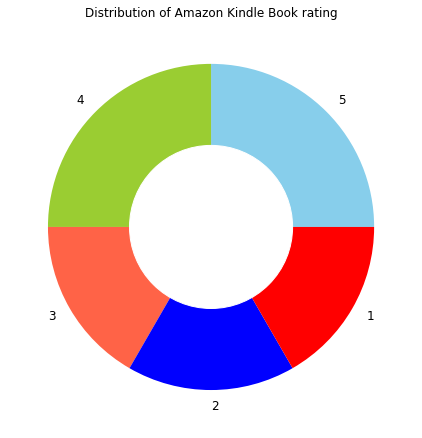

In [27]:
custom_color = ['skyblue', 'yellowgreen', 'tomato', 'blue', 'red']
plt.figure(figsize = (15,7.5))
plt.pie(rating, labels = numbers, colors = custom_color)
centre_circle = plt.Circle((0,0), 0.5, color = 'white')
fig = plt.gcf()
plt.gca().add_artist(centre_circle)
plt.rc('font', size = 12)
plt.title('Distribution of Amazon Kindle Book rating', font = '20')
plt.show()


In [30]:
sentiments = SentimentIntensityAnalyzer()
data['Positive'] = [sentiments.polarity_scores(i)['pos'] for i in data['reviewText']]
data['Negative'] = [sentiments.polarity_scores(i)['neg'] for i in data['reviewText']]
data['Neutral'] = [sentiments.polarity_scores(i)['neu'] for i in data['reviewText']]
data.head()

,Unnamed: 0.1,Unnamed: 0,asin,helpful,rating,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime,Positive,Negative,Neutral
0,0,11539,B0033UV8HI,"[8, 10]",3,"Jace Rankin may be short, but he's nothing to ...","09 2, 2010",A3HHXRELK8BHQG,Ridley,Entertaining But Average,1283385600,0.163,0.129,0.708
1,1,5957,B002HJV4DE,"[1, 1]",5,Great short read. I didn't want to put it dow...,"10 8, 2013",A2RGNZ0TRF578I,Holly Butler,Terrific menage scenes!,1381190400,0.283,0.044,0.673
2,2,9146,B002ZG96I4,"[0, 0]",3,I'll start by saying this is the first of four...,"04 11, 2014",A3S0H2HV6U1I7F,Merissa,Snapdragon Alley,1397174400,0.138,0.000,0.862
3,3,7038,B002QHWOEU,"[1, 3]",3,Aggie is Angela Lansbury who carries pocketboo...,"07 5, 2014",AC4OQW3GZ919J,Cleargrace,very light murder cozy,1404518400,0.070,0.078,0.851
4,4,1776,B001A06VJ8,"[0, 1]",4,I did not expect this type of book to be in li...,"12 31, 2012",A3C9V987IQHOQD,Rjostler,Book,1356912000,0.139,0.000,0.861


In [36]:
df2 = data[['summary','reviewText', 'Negative']]
df2.

,summary,reviewText,Negative
0,Entertaining But Average,"Jace Rankin may be short, but he's nothing to ...",0.129
1,Terrific menage scenes!,Great short read. I didn't want to put it dow...,0.044
2,Snapdragon Alley,I'll start by saying this is the first of four...,0.000
3,very light murder cozy,Aggie is Angela Lansbury who carries pocketboo...,0.078
4,Book,I did not expect this type of book to be in li...,0.000
...,...,...,...
11995,jena,Valentine cupid is a vampire- Jena and Ian ano...,0.000
11996,Peacekeepers Series,I have read all seven books in this series. Ap...,0.082
11997,a little creepy,This book really just wasn't my cuppa. The si...,0.022
11998,didn't work,"tried to use it to charge my kindle, it didn't...",0.191


In [45]:
x = sum(data["Positive"])
y = sum(data["Negative"])
z = sum(data["Neutral"])

def sentiment_score(a, b, c):
    if (a>b) and (a>c):
        print("Positive 😊 ")
    elif (b>a) and (b>c):
        print("Negative 😠 ")
    else:
        print("Neutral 🙂 ")
sentiment_score(x, y, z)
print(x)
print(y)
print(z)

Neutral 🙂 
2154.4450000000006
828.1390000000002
9017.480999999978
